### Kaden Garletts
### August 3, 2025

##### Step 1: Imports and Table Creation

###### a. imports utilized throughout project

1. Which two citys show the most correlation in terms of high temperature.

2. What is the average humidity of the cities for the last five of the 10 days.

3.  What is the least windy day out of the 10 days.

4. Which city has the most "sunny" days over the next 10 days.



In [87]:
from bs4 import BeautifulSoup #bs4 import
import requests #request import for url requests
import seaborn as sns #seaborn for plotting
import pandas as pd #pandas used for data frames
import re as re #re for regular expressions
import matplotlib.pyplot as plt #matplotlib for plotting


###### b. web-scraping for dataframe data

###### https://weather.com/weather/tenday/l/a7ad40c2f068dc2460055f29dc0152a7c68c14573c2120c1dae1ef70a3519620
###### https://weather.com/weather/tenday/l/f385ae2f638da8b6b292f234defdd6db967893b18e68346cfbbdd42f6117fca8
###### https://weather.com/weather/tenday/l/c6bde39703dedfc1113fa0573da3f07d526cf9a7b004400d8f0d02cb5ecc2d81
###### https://weather.com/weather/tenday/l/92e16dcd704251d2b3b4b0e92d4d706c9c9682a8fb603bafdb3fbbbd7a79fdd2
###### https://weather.com/weather/tenday/l/b8608131d9d060f9b7306a7c3f2e669a50b7f6d0a79e3b5196dca410957e6cb6

###### used this website for clarity reagrding class id: https://stackoverflow.com/questions/5041008/how-to-find-elements-by-class

In [ ]:

#variable format for the urls
urlNewBrunswick = "https://weather.com/weather/tenday/l/a7ad40c2f068dc2460055f29dc0152a7c68c14573c2120c1dae1ef70a3519620"
urlRockaway = "https://weather.com/weather/tenday/l/f385ae2f638da8b6b292f234defdd6db967893b18e68346cfbbdd42f6117fca8"
urlAllamuchy = "https://weather.com/weather/tenday/l/c6bde39703dedfc1113fa0573da3f07d526cf9a7b004400d8f0d02cb5ecc2d81"
urlRandolph = "https://weather.com/weather/tenday/l/92e16dcd704251d2b3b4b0e92d4d706c9c9682a8fb603bafdb3fbbbd7a79fdd2"
urlHackettstown = "https://weather.com/weather/tenday/l/b8608131d9d060f9b7306a7c3f2e669a50b7f6d0a79e3b5196dca410957e6cb6"

#request to the urls
responseNewBrunswick = requests.get(urlNewBrunswick)
responseRockaway = requests.get(urlRockaway)
responseAllamuchy = requests.get(urlAllamuchy)
responseRandolph = requests.get(urlRandolph)
responseHackettstown = requests.get(urlHackettstown)

#parsing the html content into text through requests
html_content_NewBrunswick = responseNewBrunswick.text
html_content_Rockaway = responseRockaway.text
html_content_Allamuchy = responseAllamuchy.text
html_content_Randolph = responseRandolph.text
html_content_Hackettstown = responseHackettstown.text

#creating BeautifulSoup objects for each html
soupNewBrunswick = BeautifulSoup(html_content_NewBrunswick, 'html.parser')
soupRockaway = BeautifulSoup(html_content_Rockaway, 'html.parser')
soupAllamuchy = BeautifulSoup(html_content_Allamuchy, 'html.parser')
soupRandolph = BeautifulSoup(html_content_Randolph, 'html.parser')
soupHackettstown = BeautifulSoup(html_content_Hackettstown, 'html.parser')

#finding all paragraph tags in the parsed html as an example

paragraphsNewBrunswick = soupNewBrunswick.find_all("span", {"class": "DetailsSummary--highTempValue--VHKaO"})
paragraphsRockaway = soupRockaway.find_all('p')
paragraphsAllamuchy = soupAllamuchy.find_all('p')
paragraphsRandolph = soupRandolph.find_all('p')
paragraphsHackettstown = soupHackettstown.find_all('p')



##### Answering Question 1. 

First, I created a function that seperates the degree symbol from the temperatures and also extracts the parapgraph text from the given span then class.

In [27]:
#This function cleans the 10 day forecast highest temperature for any given day.
def getTenDayForecast(tempSoup):
    countDays = 0
    tempList = []
    for p in tempSoup:
        if countDays < 10:  # Limit to the next 10 days
            a = p.get_text()
            a = a[:2] # extracts only the temperature
            tempList.append(int(a)) # converts the string to text
            countDays += 1
    return tempList

#Extracting the high temperatures for each location
highTempNewBrunswick = soupNewBrunswick.find_all("span", {"class": "DetailsSummary--highTempValue--VHKaO"})
highTempHackettstown = soupHackettstown.find_all("span", {"class": "DetailsSummary--highTempValue--VHKaO"})
highTempRockaway = soupRockaway.find_all("span", {"class": "DetailsSummary--highTempValue--VHKaO"})
highTempRandolph = soupRandolph.find_all("span", {"class": "DetailsSummary--highTempValue--VHKaO"})
highTempAllamuchy = soupAllamuchy.find_all("span", {"class": "DetailsSummary--highTempValue--VHKaO"})


Second, I created a pandas dataframe to store each city as a column and each day as a row.

In [29]:

#empty dataframe 
highTempData = pd.DataFrame({'NewBrunswick': [],
                'Hackettstown': [],
                'Rockaway': [],
                'Randolph': [],
                'Allamuchy': []
                })

#assigning columns to the temperature data
highTempData['NewBrunswick'] = getTenDayForecast(highTempNewBrunswick)
highTempData['Hackettstown'] = getTenDayForecast(highTempHackettstown)
highTempData['Rockaway'] = getTenDayForecast(highTempRockaway)
highTempData['Randolph'] = getTenDayForecast(highTempRandolph)
highTempData['Allamuchy'] = getTenDayForecast(highTempAllamuchy)

# print(highTempData) # Displays the dataframe

Third, I will use correlation to determine which city have the highest correlation with one another.
-- plotting using seaborn https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

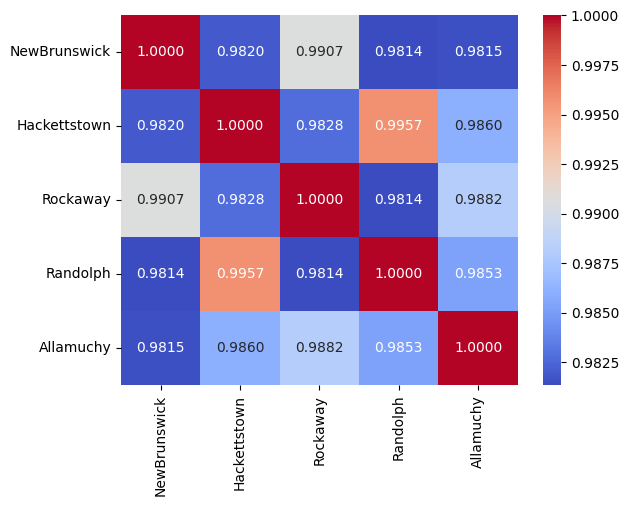

In [ ]:

# i noticed that because the data points are so close together, that it is necessary to normalize or standardize the data before determining the correlation.
highTempDataStandardized = (highTempData - highTempData.mean()) / highTempData.std()

#seaborn heatmap to visualize the correlation between the cities high temperatures
sns.heatmap(highTempDataStandardized.corr(), annot=True, cmap='coolwarm', fmt='.4f',)


Conclusively, using this heatmap / graph, it can be determined that Randolph and Hackettstown will have the highest correlating temperatures with one another over the next 10 day forecast.

##### Answering Question 2.
What is the average humidity of the cities for the last five of the 10 days?

To answer this question, first I will have to go the the cities websites and scrape the humidity data for all of them, then I will calculate the humidity for the first 10 days then clean the data so that its only the last 5 days. Finally, I will graph the humidity for the days as well as plot the average for each city.

In [ ]:
#function that takes the paragraphs from the table where the humidity is located and cleans and seprates the data
def getLastFiveHumidity(humiditySoup):
    countDays = 0
    humidityList = []
    for p in humiditySoup:
        if countDays < 10:  # Limit to the next 10 days

            a = p.get_text()
            b = re.findall(r'\d+', a)  # Extracts all digits from the string and makes a list (I used https://regex101.com/ to make the regex)
            c = ''.join(b)  # Joins the list into a string

            humidityList.append(int(c)) #appands the humidty to the list
            countDays += 1

    return tempList[:-5] #returns the last 5 days of humidity data

#Extracts the paragraph data used in the fucntion to find the humidity
humidityNewBrunswick = soupNewBrunswick.find_all("span", {"data-testid": "PercentageValue"})
humidityRockaway = soupRockaway.find_all("span", {"data-testid": "PercentageValue"})
humidityAllamuchy = soupAllamuchy.find_all("span", {"data-testid": "PercentageValue"})
humidityRandolph = soupRandolph.find_all("span", {"data-testid": "PercentageValue"})
humidityHackettstown = soupHackettstown.find_all("span", {"data-testid": "PercentageValue"})

print(humidityHackettstown)
#print(getLastFiveHumidity(humidityNewBrunswick))


[<span data-testid="PercentageValue">0%</span>, <span class="DetailsTable--value--pWEVz" data-testid="PercentageValue">46%</span>, <span class="DailyContent--value--Xgh8M" data-testid="PercentageValue">5%</span>, <span class="DetailsTable--value--pWEVz" data-testid="PercentageValue">79%</span>, <span data-testid="PercentageValue">10%</span>, <span class="DailyContent--value--Xgh8M" data-testid="PercentageValue">10%</span>, <span class="DetailsTable--value--pWEVz" data-testid="PercentageValue">59%</span>, <span class="DailyContent--value--Xgh8M" data-testid="PercentageValue">6%</span>, <span class="DetailsTable--value--pWEVz" data-testid="PercentageValue">76%</span>, <span data-testid="PercentageValue">6%</span>, <span class="DailyContent--value--Xgh8M" data-testid="PercentageValue">6%</span>, <span class="DetailsTable--value--pWEVz" data-testid="PercentageValue">65%</span>, <span class="DailyContent--value--Xgh8M" data-testid="PercentageValue">17%</span>, <span class="DetailsTable--val

Second, I am creating a dataframe using pandas to store the humidty

In [ ]:
#creates an empty dataframe for storing the humidity, icludes a day column for lengthening or making the data wide.
humidityData = pd.DataFrame({
    'Day': [],
    'NewBrunswick': [],
    'Hackettstown': [],
    'Rockaway': [],
    'Randolph': [],
    'Allamuchy': [],
    'AvgDay': [] # an average day column used for the average across all of the cities
    })

#assigning columns to the humidity data
humidityData['NewBrunswick'] = getLastFiveHumidity(humidityNewBrunswick)
humidityData['Hackettstown'] = getLastFiveHumidity(humidityHackettstown)
humidityData['Rockaway'] = getLastFiveHumidity(humidityRockaway)
humidityData['Randolph'] = getLastFiveHumidity(humidityRandolph)
humidityData['Allamuchy'] = getLastFiveHumidity(humidityAllamuchy)
humidityData['Day'] = ['Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10'] 
humidityData['AvgDay'] = humidityData[['NewBrunswick', 'Hackettstown', 'Rockaway', 'Randolph', 'Allamuchy']].mean(axis=1) #calculation for finding the mean humidity for each day

print(humidityData) # Displays the dataframe

      Day  NewBrunswick  Hackettstown  Rockaway  Randolph  Allamuchy  AvgDay
0   Day 6             0             0         0         1          1     0.4
1   Day 7            40            46        46         1          1    26.8
2   Day 8             5             5         3        47         46    21.2
3   Day 9            66            79        75         4          5    45.8
4  Day 10             4            10        10        78         79    36.2


Third, I will plot the dataframe data of the humidities using seaborn

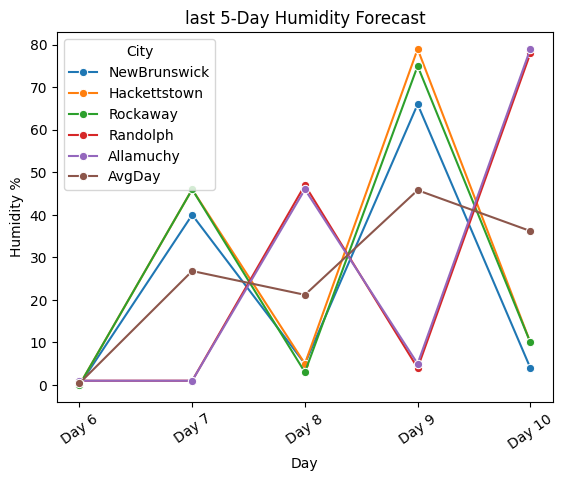

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html I used this website to help with wide data
humidityLong = humidityData.melt(id_vars='Day', var_name='City', value_name='Humidity')

# Optional: make sure days plot in correct order
humidityLong['Day'] = pd.Categorical(
    humidityLong['Day'], 
    categories=['Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10'], 
    ordered=True
)

sns.lineplot(data=humidityLong, x='Day', y='Humidity', hue='City', marker='o')
plt.title('last 5-Day Humidity Forecast')
plt.ylabel('Humidity %')
plt.xticks(rotation=35)
plt.show()


Accdording to the graph, we can see that the average humidity across the cities is going to increase over the last 5 days of the 10 day forecast. The highest average humidity between all of the days is going to be the 9th day with an average around 45% humidity.

##### Answering Question 3.

3.  What is the least windy day out of the 10 days.

To complete this question, First I will extract the wind speed from all of the 10 days from each city. Then I will take the average wind speed of all of the cities and plot it. The lowest point will be the least windy day.

In [ ]:
#function that takes the paragraphs from the table where the wind speed is located then cleans and separates the data
def getWindSpeed(windSoup):
    countDays = 0
    windList = []
    for p in windSoup:
        if countDays < 10:  # Limit to the next 10 days

            a = p.get_text()
            b = re.findall(r'\d+', a)  # Extracts all digits from the string and makes a list 
            c = ''.join(b)  # Joins the list 

            windList.append(int(c)) #appends the humidty to the list
            countDays += 1

    return tempList 

#Extracts the paragraph data used in the fucntion to find the humidity
windNewBrunswick = soupNewBrunswick.find_all("span", {"data-testid": "Wind"})
windRockaway = soupRockaway.find_all("span", {"data-testid": "Wind"})
windAllamuchy = soupAllamuchy.find_all("span", {"data-testid": "Wind"})
windRandolph = soupRandolph.find_all("span", {"data-testid": "Wind"})
windHackettstown = soupHackettstown.find_all("span", {"data-testid": "Wind"})

print(getWindSpeed(windHackettstown))
#print(getLastFiveHumidity(humidityNewBrunswick))

[4, 4, 1, 3, 3, 3, 5, 5, 3, 6]


Second, I will take the average of all of the days wind speed as well as make a dataframe.

In [ ]:
#creates an empty dataframe for storing the humidity, icludes a day column for lengthening or making the data wide.
windData = pd.DataFrame({
    'NewBrunswick': [],
    'Hackettstown': [],
    'Rockaway': [],
    'Randolph': [],
    'Allamuchy': [],
    'AvgDay': [] # an average day column used for the average across all of the cities
    })

#assigning columns to the humidity data
windData['NewBrunswick'] = getWindSpeed(windNewBrunswick)
windData['Hackettstown'] = getWindSpeed(windHackettstown)
windData['Rockaway'] = getWindSpeed(windRockaway)
windData['Randolph'] = getWindSpeed(windRandolph)
windData['Allamuchy'] = getWindSpeed(windAllamuchy)

windData['AvgDay'] = windData[['NewBrunswick', 'Hackettstown', 'Rockaway', 'Randolph', 'Allamuchy']].mean(axis=1) #calculation for finding the mean humidity for each day

<Axes: ylabel='AvgDay'>

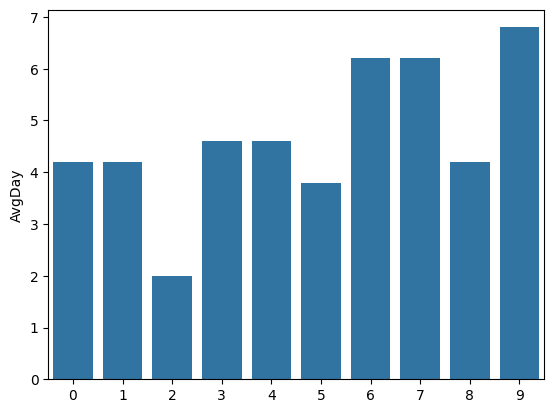

In [165]:
sns.barplot(data=windData['AvgDay'])

According to the data, the average wind speed is highest on the 10th day with an index of around 6.5 miles per hour. To further this question, I got curious if the average wind speed has any correlation with the average humidity.

In [171]:
#here i created a dataframe with the two columns i want to compare.
windAndHumidity = pd.DataFrame({
    'AverageWind': [],
    'AverageHumidity': []
})

windAndHumidity['AverageWind'] = windData['AvgDay']
windAndHumidity['AverageHumidity'] = humidityData['AvgDay'] 

windAndHumidity.corr()  # Displays the correlation between the average wind speed and average humidity

,AverageWind,AverageHumidity
AverageWind,1.000000,0.302891
AverageHumidity,0.302891,1.000000


According to the correlation matrix, the average wind and humidity have a moderately low correlation at 0.3. nonetheless, we can see that the data could very well be correlated, but we would need a far larger dataset.

##### Answering Question 4.

4. Which city has the most "sunny" days over the next 10 days.

This question varies further from the others, relying on a categorical value rather than numerical. Although not necessary, in some instances it could be necessary to convert the weather types into numbers.
ie. a range from 0-5 on how sunny it is.

First, I will scrape the website for descriptions of sunny for each of the first 10 days.

In [179]:
#function that takes the paragraphs from the table where wheather type is located then cleans and separates the data
def getWeatherType(weatherSoup):
    countDays = 0
    weatherList = []
    for p in weatherSoup:
        if countDays < 10:  # Limit to the next 10 days

            a = p.get_text() 
            if 'Sunny' in a:        #This if else stament checks to see if the text contains 'Sunny' and if it does it returns a 1, thus making the data binary
                weatherList.append(1)
            else:
                weatherList.append(0)
            countDays += 1

    return weatherList 

#Extracts the paragraph data used in the fucntion to find the Weather Type
weatherTypeNewBrunswick = soupNewBrunswick.find_all("span", {"class": "Ellipsis--ellipsis--zynqj"})
weatherTypeHackettstown = soupHackettstown.find_all("span", {"class": "Ellipsis--ellipsis--zynqj"})
weatherTypeRockaway = soupRockaway.find_all("span", {"class": "Ellipsis--ellipsis--zynqj"})
weatherTypeRandolph = soupRandolph.find_all("span", {"class": "Ellipsis--ellipsis--zynqj"})
weatherTypeAllamuchy = soupAllamuchy.find_all("span", {"class": "Ellipsis--ellipsis--zynqj"})

#print(getWeatherType(weatherTypeNewBrunswick))


For this I want to make a bar-plot that adds the total sunny days in each column city. So, first I will create a dataframe containing all of the binary values.

In [193]:
#creation of the binary dataframe for the weather type
WeatherTypeData = pd.DataFrame({
    'NewBrunswick': [],
    'Hackettstown': [],
    'Rockaway': [],
    'Randolph': [],
    'Allamuchy': []
})

#assigning columns to the weather type data
WeatherTypeData['NewBrunswick'] = getWeatherType(weatherTypeNewBrunswick)
WeatherTypeData['Hackettstown'] = getWeatherType(weatherTypeHackettstown)
WeatherTypeData['Rockaway'] = getWeatherType(weatherTypeRockaway)
WeatherTypeData['Randolph'] = getWeatherType(weatherTypeRandolph)
WeatherTypeData['Allamuchy'] = getWeatherType(weatherTypeAllamuchy)

print(WeatherTypeData)

   NewBrunswick  Hackettstown  Rockaway  Randolph  Allamuchy
0             1             1         1         1          1
1             0             0         0         0          0
2             0             0         0         0          0
3             0             0         0         0          0
4             1             1         1         1          1
5             1             1         1         1          1
6             0             0         0         0          0
7             0             0         0         0          0
8             0             0         0         0          0
9             0             0         0         0          0


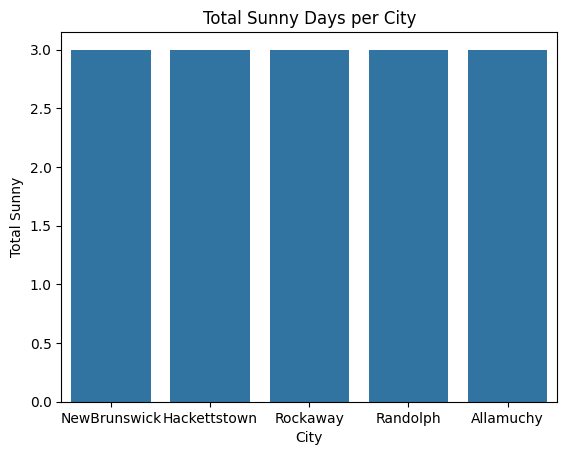

In [196]:
totals = WeatherTypeData[['NewBrunswick', 'Hackettstown', 'Rockaway', 'Randolph', 'Allamuchy']].sum()

totals_df = totals.reset_index()
totals_df.columns = ['City', 'Total Sunny']

sns.barplot(data=totals_df, x='City', y='Total Sunny')
plt.title('Total Sunny Days per City')
plt.show()

As it turns out, in an uninteresting turn of events That each city has the same amount of sunny days. So, their is no 'most-sunny' city. This is likely becuase of how close the cities are to one another that they likely get grouped under the same 'weather type'. Nonetheless, it was still interesting performiing the operations to get to this result.